<a href="https://colab.research.google.com/github/krishna324-art/Practice_Notebooks/blob/main/Scikitlearnpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
import pandas as pd
x=pd.DataFrame(iris.data,columns=iris.feature_names)
x.head()
y=pd.Series(iris.target)


In [5]:
df=x.copy()
df['target']=y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'count')

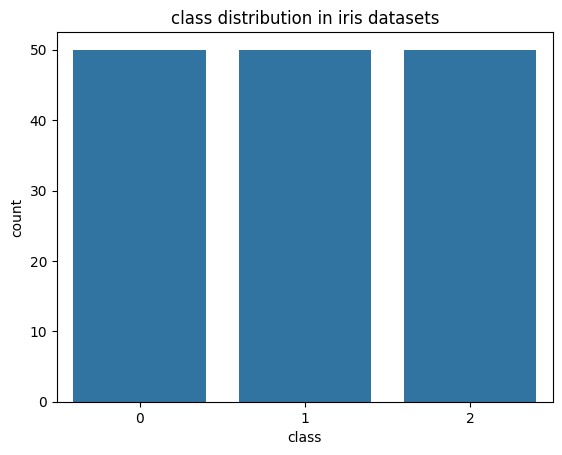

In [8]:
#class distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=y)
plt.title("class distribution in iris datasets")
plt.xlabel("class")
plt.ylabel("count")

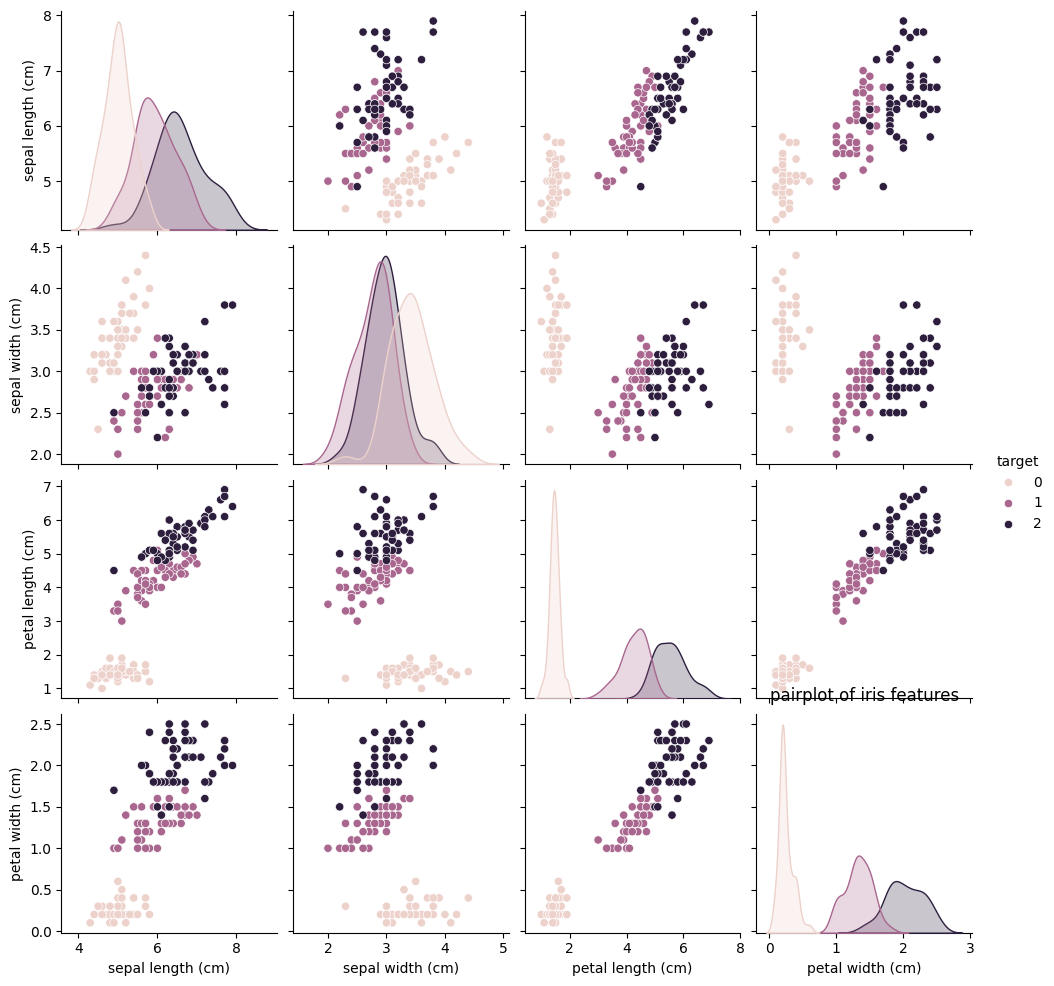

In [9]:
sns.pairplot(df,hue='target')
plt.title("pairplot of iris features",y=1.02)
plt.show()

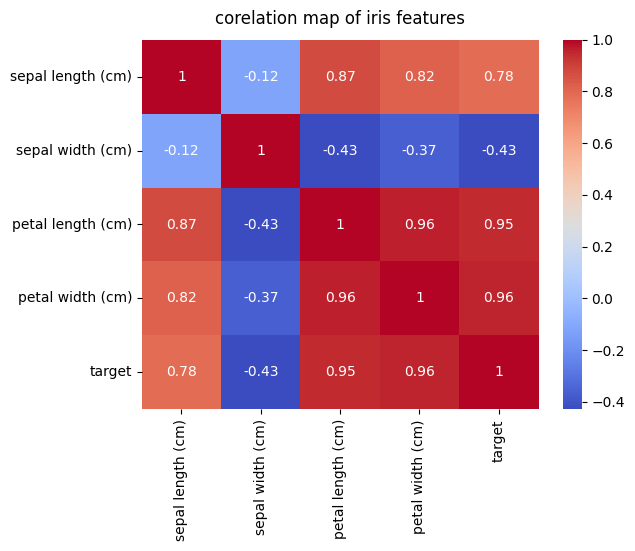

In [10]:
#corelation map
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("corelation map of iris features",y=1.02)
plt.show()



In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [13]:
#scale teh features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

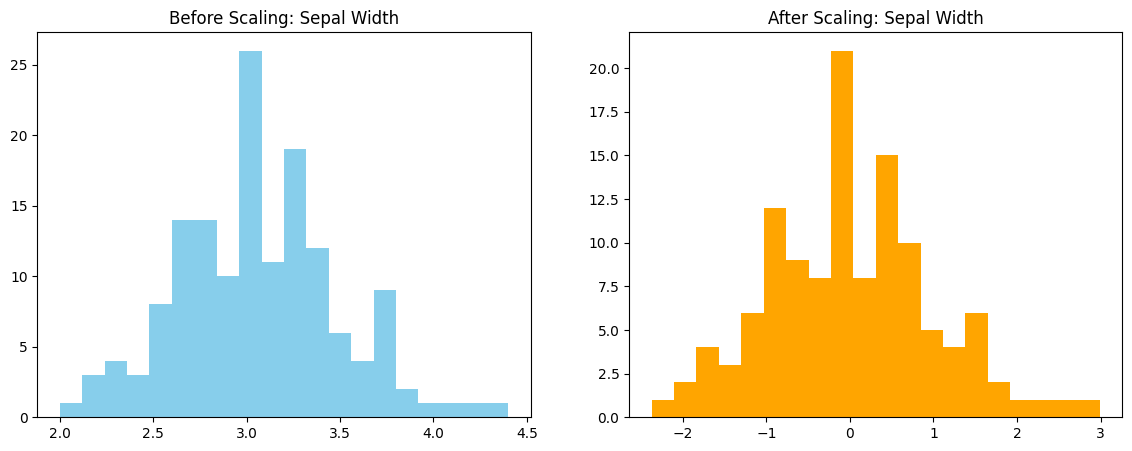

In [15]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].hist(x.iloc[:, 1], bins=20, color="skyblue")
ax[0].set_title("Before Scaling: Sepal Width")

ax[1].hist(X_train[:, 1], bins=20, color="orange")
ax[1].set_title("After Scaling: Sepal Width")
plt.show()



In [18]:
from sklearn.neighbors import  KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
y_predknn=knn.predict(X_test)

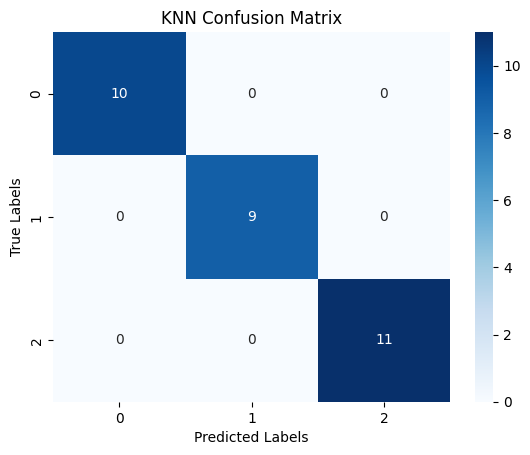

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
def plot_matrix(y_true,y_pred,title):
  cm=confusion_matrix(y_true,y_pred)
  sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
  plt.title(title)
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()
plot_matrix(Y_test,y_predknn,"KNN Confusion Matrix")

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)
y_predtree=tree.predict(X_test)

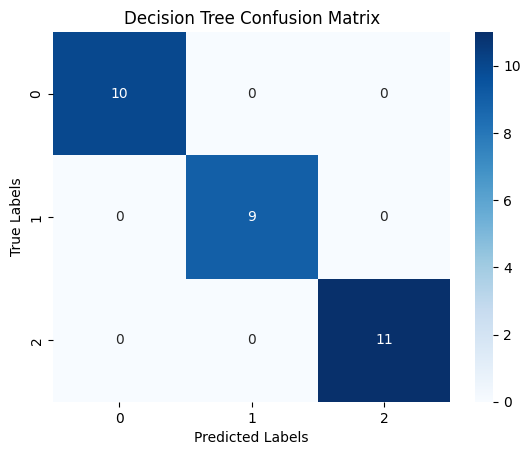

In [22]:

plot_matrix(Y_test, y_predtree, "Decision Tree Confusion Matrix")

In [23]:
print("KNN Classification Report:")
print(classification_report(Y_test, y_predknn))

print("\nDecision Tree Classification Report:")
print(classification_report(Y_test, y_predtree))

KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

